In [1]:
import pickle
from pclpy import pcl as pcl2
import pcl
import pcl.pcl_visualization
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from open3d import *

In [17]:
filename = 'loco12DS5footTM4.pickle'
file = open(filename, 'rb')
pointCloud = PointCloud()
fgbgs = {}
for i in range(0,300):
    j=0
    allPoint = np.empty((0,3))
    allColor = np.empty((0,3))
    frame = pickle.load(file) #this loads each frame in one at a time, this is where we can process each frame with the transformation matrix
    #print(i,j)
    if i == 10:
        for camera,deviceData in frame.items():
            fgbgs[camera] = deviceData['color']
    if i in range(50,200):
        for camera,deviceData in frame.items():
            if camera=='823112060874':
                #print(camera)
                cloud = pcl.PointCloud_PointXYZRGBA()
                depthFrame = deviceData['depth']
                colorFrame = deviceData['color']
                #fgmask = fgbgs[j].apply(colorFrameO)
                #colorFrame = cv2.bitwise_and(colorFrameO, colorFrameO, mask=fgmask)
                #colorFrame = cv2.subtract(colorFrameO,fgbgs[camera])
                #colorFrame[:,:,0] = np.zeros_like(colorFrame[:,:,0])
                #colorFrame[:,:,2] = colorFrame[:,:,2]*1.7
                #colorFrame[:,:,0] = colorFrame[:,:,0]*1.25
                #colorFrame[:,:,2] = cv2.equalizeHist(colorFrame[:,:,2])
                #colorFrame[:,:,0] = cv2.equalizeHist(colorFrame[:,:,0])
                #colorFrame[:,:,0] = np.clip(colorFrame[:,:,0],0,255)
                #colorFrame[:,:,1] = cv2.equalizeHist(colorFrame[:,:,1])
                hsv = cv2.cvtColor(colorFrame, cv2.COLOR_BGR2HSV)
                #hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
                #hsv[:,:,0] = cv2.equalizeHist(hsv[:,:,0])
                #print(colorFrame2)
                lower_blue = np.array([0,0,0])
                upper_blue = np.array([180,255,210])
                #lower_blue = np.array([50,50,50])
                #upper_blue = np.array([85,255,255])
                mask = cv2.inRange(hsv, lower_blue, upper_blue)
                res = cv2.bitwise_and(colorFrame,colorFrame, mask= mask)
                tim = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
                #
                cv2.imshow('color',np.hstack((tim,res)))
                cv2.waitKey(5)
                time.sleep(1/15)
                j+=1
        #rows,cols=np.where(allColor<[0.01,0.01,0.01])
        #allColor = np.delete(allColor, rows, axis=0)
        #allPoint = np.delete(allPoint, rows, axis=0)
        #pointCloud.points = Vector3dVector(allPoint)
        #pointCloud.colors = Vector3dVector(allColor)
        #voxel_down_pcd = voxel_down_sample(pointCloud, voxel_size = 0.005)
        #cl,ind = statistical_outlier_removal(voxel_down_pcd,nb_neighbors=50, std_ratio=2.0)
        """
        for k in range(0,3):
            seg = cloud.make_segmenter()
            seg.set_method_type(pcl.SAC_RANSAC)
            seg.set_model_type(pcl.SACMODEL_PLANE)
            seg.set_distance_threshold(0.025)
            indices, model = seg.segment()
            cloud = cloud.extract(indices, negative=True)
        """

        #draw_geometries([cl])
        
            #j+=1
cv2.destroyAllWindows()
    #cloud = pcl.PointCloud_PointXYZRGBA()
#cloud2 = pcl.PointCloud_PointXYZRGBA()
#allPoints = np.empty((0,4))
#for (serial, [poseMat, rmsdValue]) in self.devicesTransformation.items():
file.close()
"""
i=0
for camera,deviceData in frame.items():
    if i == 6:
        depthFrame = deviceData['depth']
        colorFrame = deviceData['color']
    i+=1

822512060522
823112060112
822512061105
822512060553
822512060853
823112060874
"""
#vis.destroy_window()

"\ni=0\nfor camera,deviceData in frame.items():\n    if i == 6:\n        depthFrame = deviceData['depth']\n        colorFrame = deviceData['color']\n    i+=1\n\n822512060522\n823112060112\n822512061105\n822512060553\n822512060853\n823112060874\n"

In [9]:
cv2.destroyAllWindows()
file.close()


In [67]:
rows,cols=np.where(allColor<[0.1,0.1,0.1])
np.delete(allColor, rows, axis=0)

array([[0.296875  , 0.40234375, 0.609375  ],
       [0.32421875, 0.40234375, 0.61328125],
       [0.32421875, 0.40234375, 0.61328125],
       ...,
       [0.859375  , 0.85546875, 0.9609375 ],
       [0.8515625 , 0.859375  , 0.953125  ],
       [0.84375   , 0.8515625 , 0.9453125 ]])

(480, 848)

In [2]:
RGB_im = cv2.imread('reflective tape test_Infrared.png',-1)
RGB_im = cv2.cvtColor(RGB_im,cv2.COLOR_RGB2BGR)

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


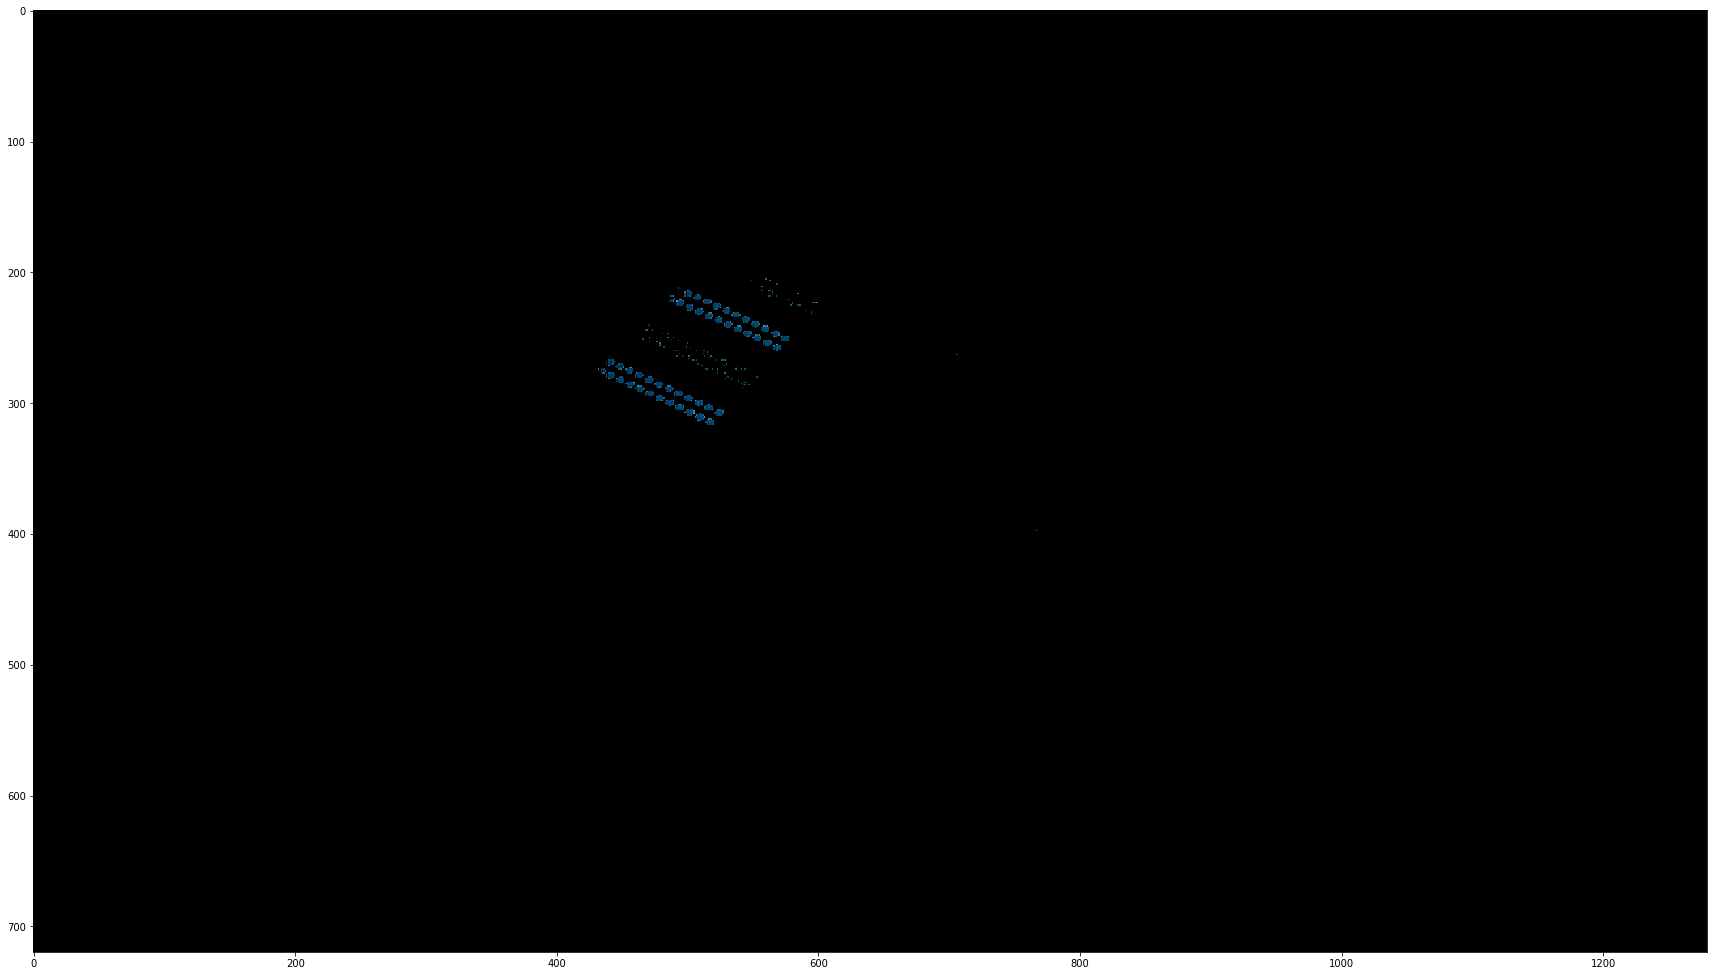

In [108]:
lower_blue = np.array([15,125,75])
upper_blue = np.array([60,255,210])
#lower_blue = np.array([50,50,50])
#upper_blue = np.array([85,255,255])
hsv = cv2.cvtColor(RGB_im, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(RGB_im,RGB_im, mask= mask)
tim = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
#cv2.imshow('color',res)
#cv2.waitKey(0)
plt.figure(figsize=(30,20))
plt.imshow(res)

##### hsv = cv2.cvtColor(colorFrame, cv2.COLOR_BGR2HSV)
lower_blue = np.array([50,50,50])
upper_blue = np.array([85,255,200])
#lower_blue = np.array([50,50,50])
#upper_blue = np.array([85,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(colorFrame,colorFrame, mask= mask)
tim = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)


fig2 = plt.figure(figsize=(16,10))
plt.imshow(tim)
plt.show()


In [13]:
colorFrame

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
colorFrame.shape

(480, 848, 3)

In [2]:
def depthFrametoPC(depth, rgb, cameraIntrinsics, poseMat):
    #starttime = time.time()
    [height,width] = np.array(depth.shape)
    #[height, width] = [depthFrame.get_height(), depthFrame.get_width()]
    #depth = np.asanyarray(depthFrame.get_data())
    #rgb = np.asanyarray(colorFrame.get_data())
    ##time1 = time.time()
    nx = np.linspace(0, width-1, width)
    ny = np.linspace(0, height-1, height)
    u, v = np.meshgrid(nx, ny)
    x = (u.flatten() - cameraIntrinsics['ppx'])/cameraIntrinsics['fx']
    y = (v.flatten() - cameraIntrinsics['ppy'])/cameraIntrinsics['fy']
    z = depth.flatten() / 1000
    x = np.multiply(x,z)
    y = np.multiply(y,z)
    ##time2 = time.time()
    #x = x[np.nonzero(z)]
    #y = y[np.nonzero(z)]
    #z = z[np.nonzero(z)]

    rgbB = rgb[:,:,0].flatten().astype(int)
    rgbG = rgb[:,:,1].flatten().astype(int)
    rgbR = rgb[:,:,2].flatten().astype(int)
    rgbPC = rgbR<<16|rgbG<<8|rgbB
    ##time3=time.time()
    points = np.asanyarray([x,y,z])

    n = points.shape[1] 
    points_ = np.vstack((points, np.ones((1,n))))
    points_trans_ = np.matmul(poseMat, points_)
    points_transformed = np.true_divide(points_trans_[:3,:], points_trans_[[-1], :])
    ##time4=time.time()
    allPoints = np.asanyarray([points_transformed[0,:],points_transformed[1,:],points_transformed[2,:],rgbR/256,rgbG/256,rgbB/256]).T
    ##times = np.array([time1,time2,time3,time4])-starttime
    ##print(times)
    return allPoints

In [18]:
np.asarray()

NameError: name 'pclPC' is not defined

In [5]:
bwim = cv2.imread('reflective tape test_Infrared.png',-1)

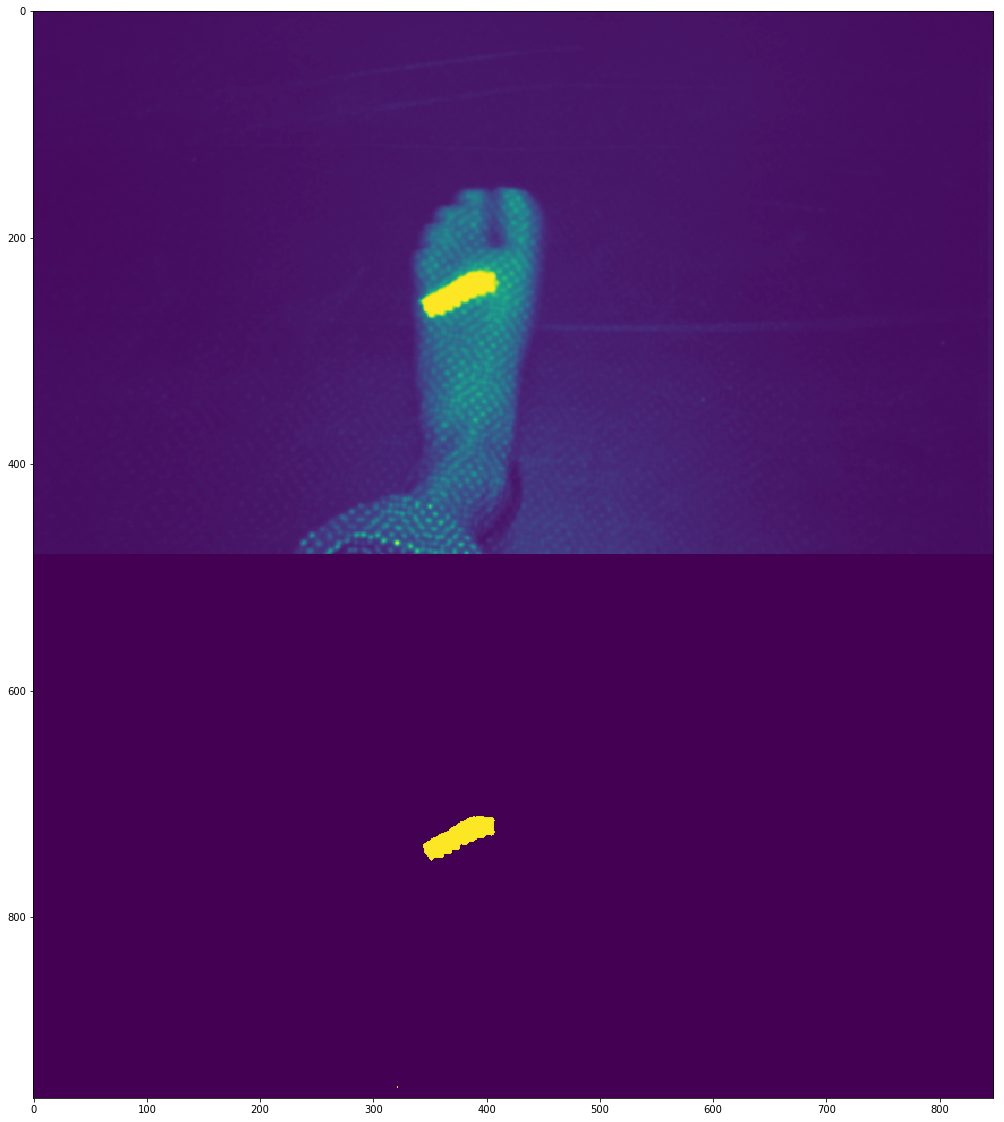

In [10]:
lower = 240
upper = 256
#lower_blue = np.array([50,50,50])
#upper_blue = np.array([85,255,255])
#hsv = cv2.cvtColor(RGB_im, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(bwim, lower, upper)
res = cv2.bitwise_and(bwim,bwim, mask= mask)
#tim = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
#cv2.imshow('color',res)
#cv2.waitKey(0)
plt.figure(figsize=(30,20))
plt.imshow(np.vstack((bwim,res)))